In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
# from scipy.stats import pearsonr, shapiro
from itertools import combinations

#import statsmodels.api as sm

## Extraction

In [6]:
path_datasets = 'Datasets/'

In [7]:
df1 = pd.read_csv(path_datasets + 'ti-corruption-perception-index.csv')
df2 = pd.read_csv(path_datasets + 'human-development-index.csv')
df3 = pd.read_csv(path_datasets + 'political-corruption-index.csv')
df4 = pd.read_csv(path_datasets + 'gdp-per-capita-worldbank.csv')
df5 = pd.read_csv(path_datasets + 'democracy-index-eiu.csv')
df6 = pd.read_csv(path_datasets + 'electoral-democracy-index.csv')
df7 = pd.read_csv(path_datasets + 'freedom-of-expression-index.csv')
df1

,Entity,Code,Year,Corruption Perceptions Index
0,Afghanistan,AFG,2012,8
1,Afghanistan,AFG,2013,8
2,Afghanistan,AFG,2014,12
3,Afghanistan,AFG,2015,11
4,Afghanistan,AFG,2016,15
...,...,...,...,...
2307,Zimbabwe,ZWE,2020,24
2308,Zimbabwe,ZWE,2021,23
2309,Zimbabwe,ZWE,2022,23
2310,Zimbabwe,ZWE,2023,24


# Hypothèses 1 - Corrélation entre corruption et niveau de développement économique
#### Les pays avec un PIB par habitant plus élevé présentent une perception de la corruption plus faible

## Merge

In [43]:
df_final = df1.merge(df2, on=['Entity', 'Code', 'Year'], how='left')
df_final

,Entity,Code,Year,Corruption Perceptions Index,Human Development Index
0,Afghanistan,AFG,2012,8,0.484
1,Afghanistan,AFG,2013,8,0.492
2,Afghanistan,AFG,2014,12,0.497
3,Afghanistan,AFG,2015,11,0.496
4,Afghanistan,AFG,2016,15,0.495
...,...,...,...,...,...
2307,Zimbabwe,ZWE,2020,24,0.582
2308,Zimbabwe,ZWE,2021,23,0.581
2309,Zimbabwe,ZWE,2022,23,0.594
2310,Zimbabwe,ZWE,2023,24,0.598


In [44]:
df_final = df_final.merge(df3, on=['Entity', 'Code', 'Year'], how='left')
df_final

,Entity,Code,Year,Corruption Perceptions Index,Human Development Index,Political corruption index (central estimate)
0,Afghanistan,AFG,2012,8,0.484,0.961
1,Afghanistan,AFG,2013,8,0.492,0.941
2,Afghanistan,AFG,2014,12,0.497,0.927
3,Afghanistan,AFG,2015,11,0.496,0.904
4,Afghanistan,AFG,2016,15,0.495,0.905
...,...,...,...,...,...,...
2307,Zimbabwe,ZWE,2020,24,0.582,0.795
2308,Zimbabwe,ZWE,2021,23,0.581,0.826
2309,Zimbabwe,ZWE,2022,23,0.594,0.806
2310,Zimbabwe,ZWE,2023,24,0.598,0.862


In [45]:
df_final = df_final.merge(df4, on=['Entity', 'Code', 'Year'], how='left')
df_final

,Entity,Code,Year,Corruption Perceptions Index,Human Development Index,Political corruption index (central estimate),"GDP per capita, PPP (constant 2021 international $)"
0,Afghanistan,AFG,2012,8,0.484,0.961,2985.3190
1,Afghanistan,AFG,2013,8,0.492,0.941,3046.5798
2,Afghanistan,AFG,2014,12,0.497,0.927,3017.9426
3,Afghanistan,AFG,2015,11,0.496,0.904,2967.6921
4,Afghanistan,AFG,2016,15,0.495,0.905,2958.7854
...,...,...,...,...,...,...,...
2307,Zimbabwe,ZWE,2020,24,0.582,0.795,2987.2698
2308,Zimbabwe,ZWE,2021,23,0.581,0.826,3184.7854
2309,Zimbabwe,ZWE,2022,23,0.594,0.806,3323.1218
2310,Zimbabwe,ZWE,2023,24,0.598,0.862,3442.2512


In [46]:
df_final.describe

<bound method NDFrame.describe of            Entity Code  Year  Corruption Perceptions Index  \
0     Afghanistan  AFG  2012                             8   
1     Afghanistan  AFG  2013                             8   
2     Afghanistan  AFG  2014                            12   
3     Afghanistan  AFG  2015                            11   
4     Afghanistan  AFG  2016                            15   
...           ...  ...   ...                           ...   
2307     Zimbabwe  ZWE  2020                            24   
2308     Zimbabwe  ZWE  2021                            23   
2309     Zimbabwe  ZWE  2022                            23   
2310     Zimbabwe  ZWE  2023                            24   
2311     Zimbabwe  ZWE  2024                            21   

      Human Development Index  Political corruption index (central estimate)  \
0                       0.484                                          0.961   
1                       0.492                                

## Nettoyage et transformation

1. Renommer les colonnes (pour avoir des noms simples)

In [47]:
df_final.rename(columns={
    'Corruption Perceptions Index': 'corruption_index',
    'Human Development Index': 'hdi',
    'Political corruption index (central estimate)': 'political_corruption_index',
    'GDP per capita, PPP (constant 2021 international $)': 'gdp_per_capita'
}, inplace=True)

In [48]:
df_final

,Entity,Code,Year,corruption_index,hdi,political_corruption_index,gdp_per_capita
0,Afghanistan,AFG,2012,8,0.484,0.961,2985.3190
1,Afghanistan,AFG,2013,8,0.492,0.941,3046.5798
2,Afghanistan,AFG,2014,12,0.497,0.927,3017.9426
3,Afghanistan,AFG,2015,11,0.496,0.904,2967.6921
4,Afghanistan,AFG,2016,15,0.495,0.905,2958.7854
...,...,...,...,...,...,...,...
2307,Zimbabwe,ZWE,2020,24,0.582,0.795,2987.2698
2308,Zimbabwe,ZWE,2021,23,0.581,0.826,3184.7854
2309,Zimbabwe,ZWE,2022,23,0.594,0.806,3323.1218
2310,Zimbabwe,ZWE,2023,24,0.598,0.862,3442.2512


2. Supprimer les lignes avec des données critiques manquantes

In [49]:
df_clean = df_final.dropna(subset=['corruption_index', 'gdp_per_capita'])

In [50]:
df_clean

,Entity,Code,Year,corruption_index,hdi,political_corruption_index,gdp_per_capita
0,Afghanistan,AFG,2012,8,0.484,0.961,2985.3190
1,Afghanistan,AFG,2013,8,0.492,0.941,3046.5798
2,Afghanistan,AFG,2014,12,0.497,0.927,3017.9426
3,Afghanistan,AFG,2015,11,0.496,0.904,2967.6921
4,Afghanistan,AFG,2016,15,0.495,0.905,2958.7854
...,...,...,...,...,...,...,...
2306,Zimbabwe,ZWE,2019,24,0.584,0.765,3294.8062
2307,Zimbabwe,ZWE,2020,24,0.582,0.795,2987.2698
2308,Zimbabwe,ZWE,2021,23,0.581,0.826,3184.7854
2309,Zimbabwe,ZWE,2022,23,0.594,0.806,3323.1218


3. Appliquer une transformation log sur le PIB

* les valeurs PIB varient énormément cela peut fausser les corrélations et aplatir les petits pays dans les graphiques
* Le logarithme ramène tout à une échelle plus "compressée", en respectant l’ordre. 

In [51]:
df_clean['log_gdp_per_capita'] = np.log(df_clean['gdp_per_capita'])

/var/folders/40/z21v_lnd0q15_q7p4pqzv2740000gn/T/ipykernel_91317/1921568117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['log_gdp_per_capita'] = np.log(df_clean['gdp_per_capita'])


In [52]:
df_clean

,Entity,Code,Year,corruption_index,hdi,political_corruption_index,gdp_per_capita,log_gdp_per_capita
0,Afghanistan,AFG,2012,8,0.484,0.961,2985.3190,8.001462
1,Afghanistan,AFG,2013,8,0.492,0.941,3046.5798,8.021775
2,Afghanistan,AFG,2014,12,0.497,0.927,3017.9426,8.012331
3,Afghanistan,AFG,2015,11,0.496,0.904,2967.6921,7.995540
4,Afghanistan,AFG,2016,15,0.495,0.905,2958.7854,7.992534
...,...,...,...,...,...,...,...,...
2306,Zimbabwe,ZWE,2019,24,0.584,0.765,3294.8062,8.100103
2307,Zimbabwe,ZWE,2020,24,0.582,0.795,2987.2698,8.002115
2308,Zimbabwe,ZWE,2021,23,0.581,0.826,3184.7854,8.066140
2309,Zimbabwe,ZWE,2022,23,0.594,0.806,3323.1218,8.108660


 ### Visualisation avec régression linéaire

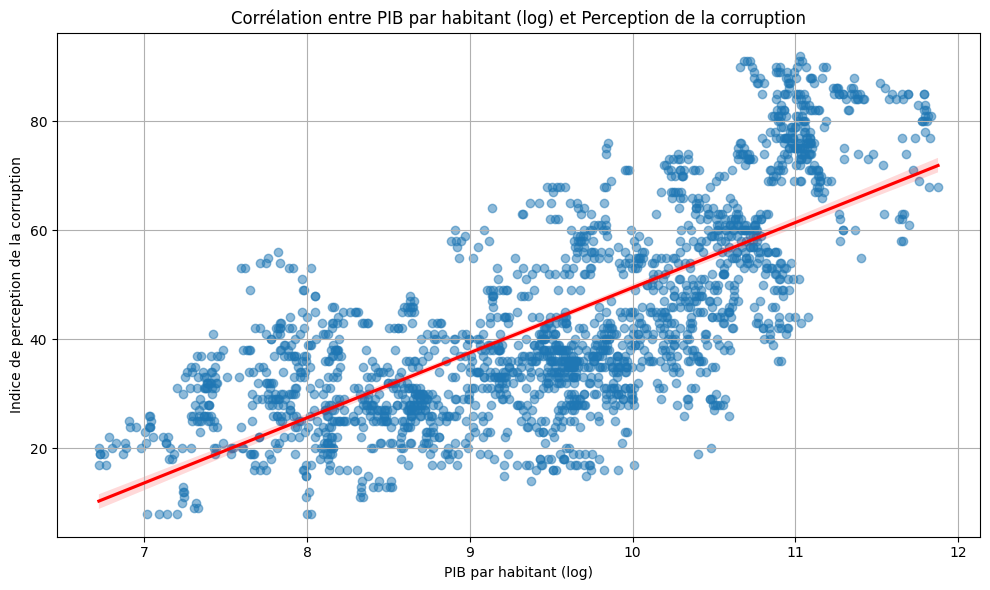

In [53]:
plt.figure(figsize=(10, 6))
sns.regplot(
    x='log_gdp_per_capita',
    y='corruption_index',
    data=df_clean,
    scatter_kws={'alpha':0.5},
    line_kws={'color': 'red'}
)
plt.title("Corrélation entre PIB par habitant (log) et Perception de la corruption")
plt.xlabel("PIB par habitant (log)")
plt.ylabel("Indice de perception de la corruption")
plt.grid(True)
plt.tight_layout()
plt.show()


* plus le log(PIB/habitant) est élevé, plus l’indice de perception de la corruption est élevé.
* Plus un pays est riche, plus il est perçu comme étant peu corrompu

### Corrélation de Pearson 

La corrélation de Pearson est une mesure qui permet de quantifier la force et la direction de la relation linéaire entre deux variables numériques, c'est un nombre entre -1 et 1 ( 1 corrélation parfaitement positive , -1 corrélation parfaitement négative , pas de corrélation linéaire).

ça mesure si les deux variables évoluent ensemble (dans le même ou dans le sens opposé).

In [54]:
corr, pval = pearsonr(df_clean['log_gdp_per_capita'], df_clean['corruption_index'])
print(f"Corrélation de Pearson : {corr:.3f}")
print(f"P-value associée : {pval:.4f}")

Corrélation de Pearson : 0.729
P-value associée : 0.0000


* 0.729 = corrélation positive forte
* Cela signifie que quand le PIB par habitant augmente, l’indice de perception de la corruption augmente aussi
* Et comme un indice plus élevé = moins de corruption perçue, cela confirme bien :
  #### Les pays plus riches sont perçus comme moins corrompus.

### Régression linéaire

In [55]:
X = sm.add_constant(df_clean['log_gdp_per_capita'])
y = df_clean['corruption_index']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       corruption_index   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     2324.
Date:                Sun, 06 Jul 2025   Prob (F-statistic):               0.00
Time:                        00:11:21   Log-Likelihood:                -8142.6
No. Observations:                2045   AIC:                         1.629e+04
Df Residuals:                    2043   BIC:                         1.630e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -69.8655      2

### K-means

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Étape 1 : Sélection des variables pour le clustering
features = ['log_gdp_per_capita', 'corruption_index', 'hdi']
X = df_clean[features]

# Étape 2 : Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Étape 3 : K-means avec 3 clusters (modifiable)
kmeans = KMeans(n_clusters=3, random_state=0)
df_clean['cluster'] = kmeans.fit_predict(X_scaled)


ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

# Hypothèses 3 - Corrélation entre Démocratie et corruption
#### Les régimes démocratiques sont associés à une perception de la corruption plus faible que les régimes autoritaires.

## Merge

In [14]:
df_final_h3 = df1.merge(df3, on=['Entity', 'Code', 'Year'], how='left')
df_final_h3

,Entity,Code,Year,Corruption Perceptions Index,Political corruption index (central estimate)
0,Afghanistan,AFG,2012,8,0.961
1,Afghanistan,AFG,2013,8,0.941
2,Afghanistan,AFG,2014,12,0.927
3,Afghanistan,AFG,2015,11,0.904
4,Afghanistan,AFG,2016,15,0.905
...,...,...,...,...,...
2307,Zimbabwe,ZWE,2020,24,0.795
2308,Zimbabwe,ZWE,2021,23,0.826
2309,Zimbabwe,ZWE,2022,23,0.806
2310,Zimbabwe,ZWE,2023,24,0.862


In [15]:
df_final_h3 = df_final_h3.merge(df5, on=['Entity', 'Code', 'Year'], how='left')
df_final_h3

,Entity,Code,Year,Corruption Perceptions Index,Political corruption index (central estimate),Democracy index
0,Afghanistan,AFG,2012,8,0.961,2.48
1,Afghanistan,AFG,2013,8,0.941,2.48
2,Afghanistan,AFG,2014,12,0.927,2.77
3,Afghanistan,AFG,2015,11,0.904,2.77
4,Afghanistan,AFG,2016,15,0.905,2.55
...,...,...,...,...,...,...
2307,Zimbabwe,ZWE,2020,24,0.795,3.16
2308,Zimbabwe,ZWE,2021,23,0.826,2.92
2309,Zimbabwe,ZWE,2022,23,0.806,2.92
2310,Zimbabwe,ZWE,2023,24,0.862,3.04


In [16]:
df_final_h3 = df_final_h3.merge(df6, on=['Entity', 'Code', 'Year'], how='left')
df_final_h3

,Entity,Code,Year,Corruption Perceptions Index,Political corruption index (central estimate),Democracy index,Electoral democracy index (central estimate)
0,Afghanistan,AFG,2012,8,0.961,2.48,0.362
1,Afghanistan,AFG,2013,8,0.941,2.48,0.357
2,Afghanistan,AFG,2014,12,0.927,2.77,0.355
3,Afghanistan,AFG,2015,11,0.904,2.77,0.353
4,Afghanistan,AFG,2016,15,0.905,2.55,0.340
...,...,...,...,...,...,...,...
2307,Zimbabwe,ZWE,2020,24,0.795,3.16,0.294
2308,Zimbabwe,ZWE,2021,23,0.826,2.92,0.289
2309,Zimbabwe,ZWE,2022,23,0.806,2.92,0.286
2310,Zimbabwe,ZWE,2023,24,0.862,3.04,0.291


In [17]:
df_final_h3 = df_final_h3.merge(df7, on=['Entity', 'Code', 'Year'], how='left')
df_final_h3

,Entity,Code,Year,Corruption Perceptions Index,Political corruption index (central estimate),Democracy index,Electoral democracy index (central estimate),Freedom of expression and alternative sources of information index (central estimate)
0,Afghanistan,AFG,2012,8,0.961,2.48,0.362,0.722
1,Afghanistan,AFG,2013,8,0.941,2.48,0.357,0.712
2,Afghanistan,AFG,2014,12,0.927,2.77,0.355,0.697
3,Afghanistan,AFG,2015,11,0.904,2.77,0.353,0.693
4,Afghanistan,AFG,2016,15,0.905,2.55,0.340,0.651
...,...,...,...,...,...,...,...,...
2307,Zimbabwe,ZWE,2020,24,0.795,3.16,0.294,0.459
2308,Zimbabwe,ZWE,2021,23,0.826,2.92,0.289,0.468
2309,Zimbabwe,ZWE,2022,23,0.806,2.92,0.286,0.433
2310,Zimbabwe,ZWE,2023,24,0.862,3.04,0.291,0.431


## Nettoyage et transformation

In [20]:
df_final_h3.rename(columns={
    'Corruption Perceptions Index': 'corruption_index',
    'Political corruption index (central estimate)': 'political_corruption_index',
    'Democracy index': 'democracy_index',
    'Electoral democracy index (central estimate)':'electoral_democracy_index',
    'Freedom of expression and alternative sources of information index (central estimate)': 'freedom_of_expression_index'
}, inplace=True)

df_final_h3

,Entity,Code,Year,corruption_index,political_corruption_index,democracy_index,electoral_democracy_index,freedom_of_expression_index
0,Afghanistan,AFG,2012,8,0.961,2.48,0.362,0.722
1,Afghanistan,AFG,2013,8,0.941,2.48,0.357,0.712
2,Afghanistan,AFG,2014,12,0.927,2.77,0.355,0.697
3,Afghanistan,AFG,2015,11,0.904,2.77,0.353,0.693
4,Afghanistan,AFG,2016,15,0.905,2.55,0.340,0.651
...,...,...,...,...,...,...,...,...
2307,Zimbabwe,ZWE,2020,24,0.795,3.16,0.294,0.459
2308,Zimbabwe,ZWE,2021,23,0.826,2.92,0.289,0.468
2309,Zimbabwe,ZWE,2022,23,0.806,2.92,0.286,0.433
2310,Zimbabwe,ZWE,2023,24,0.862,3.04,0.291,0.431


In [21]:
df_clean_h3 = df_final_h3.dropna(subset=['corruption_index', 'political_corruption_index', 'democracy_index', 'electoral_democracy_index', 'freedom_of_expression_index'])
df_clean_h3

,Entity,Code,Year,corruption_index,political_corruption_index,democracy_index,electoral_democracy_index,freedom_of_expression_index
0,Afghanistan,AFG,2012,8,0.961,2.48,0.362,0.722
1,Afghanistan,AFG,2013,8,0.941,2.48,0.357,0.712
2,Afghanistan,AFG,2014,12,0.927,2.77,0.355,0.697
3,Afghanistan,AFG,2015,11,0.904,2.77,0.353,0.693
4,Afghanistan,AFG,2016,15,0.905,2.55,0.340,0.651
...,...,...,...,...,...,...,...,...
2307,Zimbabwe,ZWE,2020,24,0.795,3.16,0.294,0.459
2308,Zimbabwe,ZWE,2021,23,0.826,2.92,0.289,0.468
2309,Zimbabwe,ZWE,2022,23,0.806,2.92,0.286,0.433
2310,Zimbabwe,ZWE,2023,24,0.862,3.04,0.291,0.431


On crée une colonne pour indiquer si le pays est une démocratie, démocratie imparfaite ou une dictature

In [23]:
bins = [-np.inf, 4, 6, np.inf]
labels = ['authoritarian', 'flawed_democracy', 'democracy']
df_clean_h3['regime'] = pd.cut(df_clean_h3['democracy_index'], bins=bins, labels=labels, right=True)

df_clean_h3

/tmp/ipykernel_167684/71677504.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_h3['regime'] = pd.cut(df_clean_h3['democracy_index'], bins=bins, labels=labels, right=True)


,Entity,Code,Year,corruption_index,political_corruption_index,democracy_index,electoral_democracy_index,freedom_of_expression_index,regime
0,Afghanistan,AFG,2012,8,0.961,2.48,0.362,0.722,authoritarian
1,Afghanistan,AFG,2013,8,0.941,2.48,0.357,0.712,authoritarian
2,Afghanistan,AFG,2014,12,0.927,2.77,0.355,0.697,authoritarian
3,Afghanistan,AFG,2015,11,0.904,2.77,0.353,0.693,authoritarian
4,Afghanistan,AFG,2016,15,0.905,2.55,0.340,0.651,authoritarian
...,...,...,...,...,...,...,...,...,...
2307,Zimbabwe,ZWE,2020,24,0.795,3.16,0.294,0.459,authoritarian
2308,Zimbabwe,ZWE,2021,23,0.826,2.92,0.289,0.468,authoritarian
2309,Zimbabwe,ZWE,2022,23,0.806,2.92,0.286,0.433,authoritarian
2310,Zimbabwe,ZWE,2023,24,0.862,3.04,0.291,0.431,authoritarian


In [24]:
df_clean_h3.dtypes

Entity                           object
Code                             object
Year                              int64
corruption_index                  int64
political_corruption_index      float64
democracy_index                 float64
electoral_democracy_index       float64
freedom_of_expression_index     float64
regime                         category
dtype: object

In [26]:
na = df_clean_h3.isna().mean().sort_values(ascending=False)
na

Entity                         0.0
Code                           0.0
Year                           0.0
corruption_index               0.0
political_corruption_index     0.0
democracy_index                0.0
electoral_democracy_index      0.0
freedom_of_expression_index    0.0
regime                         0.0
dtype: float64

## Analyses descriptives

#### Moyennes, maximum et minimum de corruption par régime

In [30]:
df_clean_h3.groupby('regime')['corruption_index'].describe()

/tmp/ipykernel_167684/1010418082.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_clean_h3.groupby('regime')['corruption_index'].describe()


,count,mean,std,min,25%,50%,75%,max
regime,,,,,,,,
authoritarian,698.0,29.729226,12.664404,8.0,20.0,27.0,36.0,71.0
flawed_democracy,469.0,34.458422,10.864201,15.0,28.0,32.0,38.0,87.0
democracy,977.0,55.858751,17.751487,24.0,40.0,54.0,73.0,92.0


#### T-test ou Mann-Whitney

In [52]:
# T-test ou Mann-Whitney
g1 = df_clean_h3[df_clean_h3['regime'] == 'democracy']['corruption_index']
g2 = df_clean_h3[df_clean_h3['regime'] == 'flawed_democracy']['corruption_index']
g3 = df_clean_h3[df_clean_h3['regime'] == 'authoritarian']['corruption_index']

print("Shapiro democracy:", stats.shapiro(g1))
print("Shapiro flawed_democracy:", stats.shapiro(g2))
print("Shapiro authoritarian:", stats.shapiro(g3))

Shapiro democracy: ShapiroResult(statistic=np.float64(0.9433570373502094), pvalue=np.float64(7.191217208891707e-19))
Shapiro flawed_democracy: ShapiroResult(statistic=np.float64(0.8521875288075943), pvalue=np.float64(1.413845294422307e-20))
Shapiro authoritarian: ShapiroResult(statistic=np.float64(0.9216041455798247), pvalue=np.float64(1.412782500395268e-18))


Toutes les distributions s’écartent significativement de la normalité → ANOVA inapplicable.

In [53]:
# Si tous p > 0.05 → normalité ≈ ok
if all([stats.shapiro(g).pvalue > 0.05 for g in [g1, g2, g3]]):
    # ANOVA classique
    anova = stats.f_oneway(g1, g2, g3)
    print("ANOVA:", anova)
else:
    # Kruskal-Wallis (non paramétrique)
    kruskal_res = stats.kruskal(g1, g2, g3)
    print("Kruskal-Wallis:", kruskal_res)

Kruskal-Wallis: KruskalResult(statistic=np.float64(959.9761411593744), pvalue=np.float64(3.49807863407676e-209))


Au moins une distribution diffère significativement des autres.

In [55]:
# Comparaisons par paires
pairs = list(combinations(['democracy', 'flawed_democracy', 'authoritarian'], 2))

for a, b in pairs:
    g1 = df_clean_h3[df_clean_h3['regime'] == a]['corruption_index']
    g2 = df_clean_h3[df_clean_h3['regime'] == b]['corruption_index']
    stat, p = stats.mannwhitneyu(g1, g2, alternative='two-sided')
    print(f"{a} vs {b} — p-value: {p}")

democracy vs flawed_democracy — p-value: 8.024478212979155e-113
democracy vs authoritarian — p-value: 2.0974291057411935e-165
flawed_democracy vs authoritarian — p-value: 1.0077224959802127e-18


La différence entre :

Une **démocratie** et une **démocratie imparfaite** est **forte**

Une **démocratie** et un **régime autoritaire** est **massive**


Un **régime autoritaire** et une **démocratie imparfaite** est **moyenne**

#### Boxplot corruption par régime

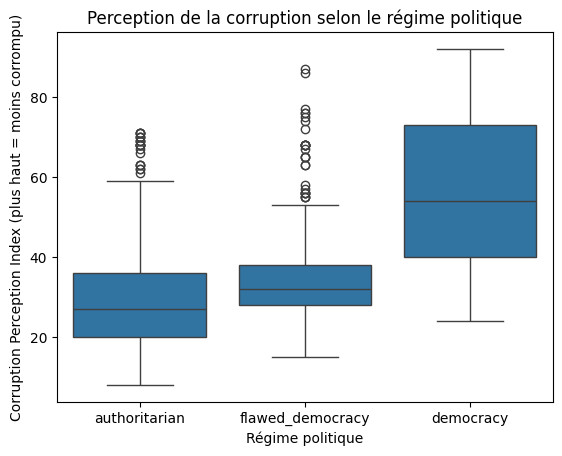

In [57]:
sns.boxplot(x='regime', y='corruption_index', data=df_clean_h3, order=['authoritarian', 'flawed_democracy', 'democracy'])
plt.title("Perception de la corruption selon le régime politique")
plt.ylabel("Corruption Perception Index (plus haut = moins corrompu)")
plt.xlabel("Régime politique")
plt.show()

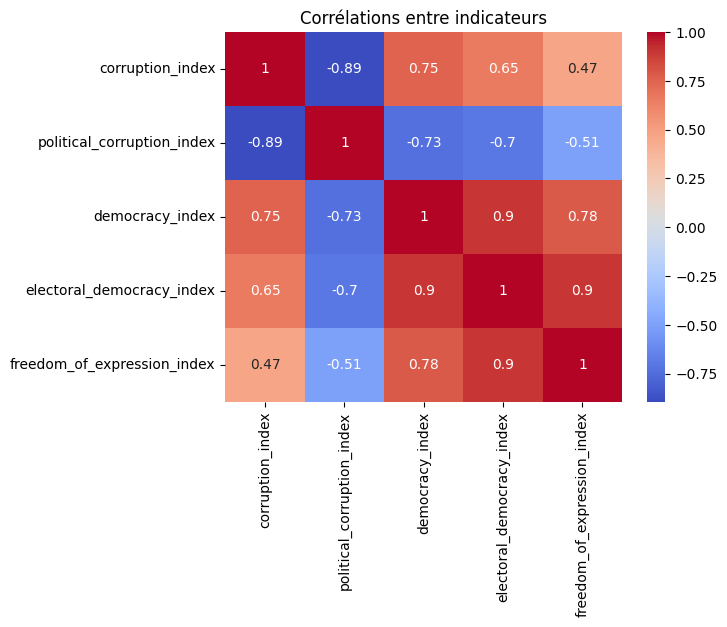

In [59]:
plt.figure()
corr = df_clean_h3[['corruption_index', 'political_corruption_index', 'democracy_index',
           'electoral_democracy_index', 'freedom_of_expression_index']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Corrélations entre indicateurs")
plt.show()

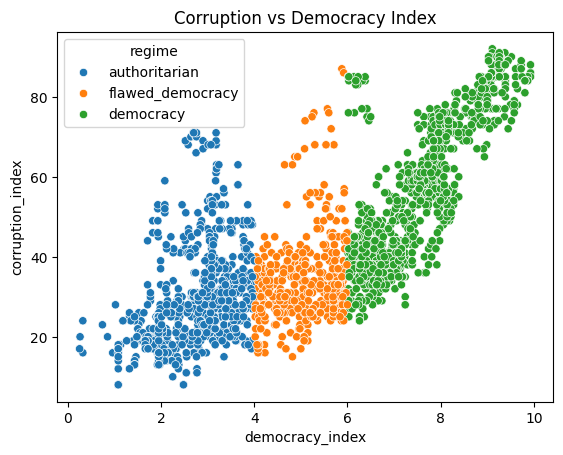

In [ ]:
plt.figure()
sns.scatterplot(x='democracy_index', y='corruption_index', hue='regime', data=df_clean_h3)
plt.title("Corruption vs Democracy Index")

plt.show()

/tmp/ipykernel_167684/927356784.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_mean_year = df_clean_h3.groupby(['Year', 'regime'])['corruption_index'].mean().reset_index()


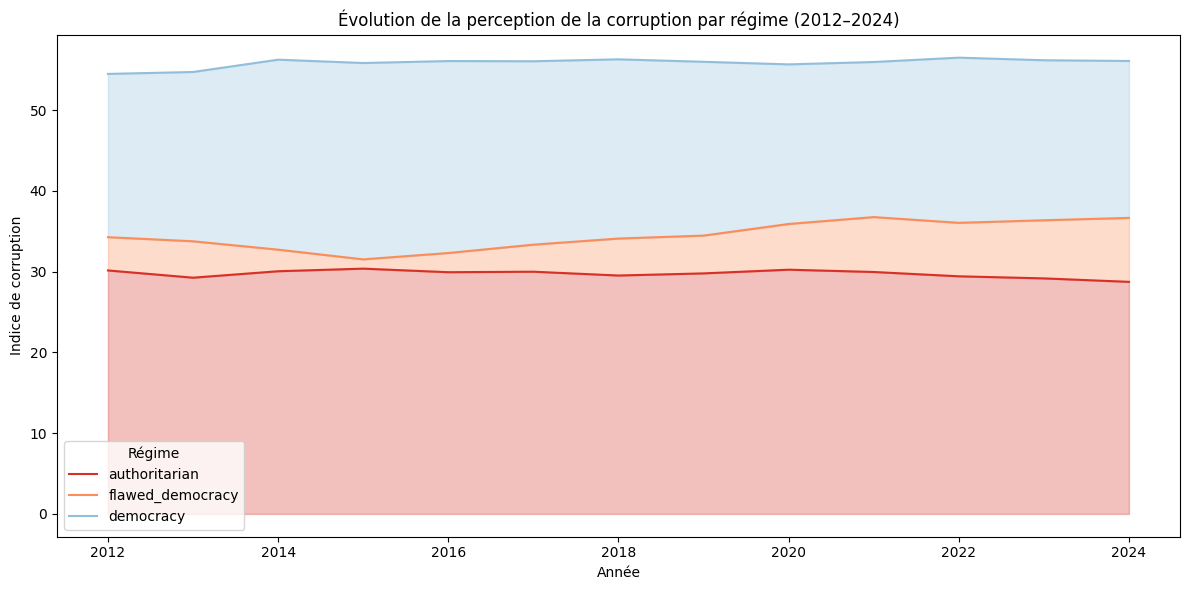

In [67]:
# Moyenne annuelle par régime
df_mean_year = df_clean_h3.groupby(['Year', 'regime'])['corruption_index'].mean().reset_index()

# Pivot : années en index, régimes en colonnes
pivot_df = df_mean_year.pivot(index='Year', columns='regime', values='corruption_index')

# Ordonner les régimes par valeur moyenne (croissant)
mean_levels = pivot_df.mean().sort_values()
regimes_ordered = mean_levels.index.tolist()

# Palette couleur
regimes = ['authoritarian', 'flawed_democracy', 'democracy']

colors = {
    'authoritarian': '#d73027',        # rouge foncé
    'flawed_democracy': '#fc8d59',     # orange clair
    'democracy': '#91bfdb'             # bleu pâle
}

# Tracé
plt.figure(figsize=(12, 6))

# Remplissage de 0 jusqu'à la première courbe (minimale)
first = regimes_ordered[0]
plt.fill_between(pivot_df.index, 0, pivot_df[first], color=colors[first], alpha=0.3)

# Remplissage entre les courbes suivantes
for i in range(len(regimes_ordered) - 1):
    lower = pivot_df[regimes_ordered[i]]
    upper = pivot_df[regimes_ordered[i + 1]]
    plt.fill_between(pivot_df.index, lower, upper, color=colors[regimes_ordered[i + 1]], alpha=0.3)

# Tracé des lignes
for regime in regimes_ordered:
    plt.plot(pivot_df.index, pivot_df[regime], label=regime, color=colors[regime])

# Affichage
plt.title("Évolution de la perception de la corruption par régime (2012–2024)")
plt.xlabel("Année")
plt.ylabel("Indice de corruption")
plt.legend(title="Régime")
plt.tight_layout()
plt.show()

## Conclusion des analyses

Il existe des différences hautement significatives entre tous les types de régimes.

Les démocraties présentent les scores les plus élevés sur l’index de perception de corruption (donc perçoivent moins de corruption).

Les régimes autoritaires sont ceux où la corruption est perçue comme la plus forte.

Les démocraties imparfaites sont intermédiaires, mais plus proches des démocraties que des autoritarismes.